# **Face and Eye Detection with Haar Cascade Classifiers**

**In this lesson we'll learn:**
1. To use a Haarcascade Classifer to detect faces
2. To use a Haarcascade Classifer to detect eyes
3. To use a Haarcascade Classifer to detect faces and eyes from your webcam in Colab


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(image = None,title = "", size = 10):
    w, h = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



## **Simple Face Detection using Haarcascade Classifiers**

**Firstly, What is Object Detection?**

**Object Detection** is the ability to detect and classify individual objects in an image and draw a bounding box over the object's area. 

![](https://miro.medium.com/max/739/1*zlWrCk1hBBFRXa5t84lmHQ.jpeg)



**HAAR Cascade Classifiers**

Developed by Viola and Jones in 2001.
An object detection method that uses a series of classifiers (cascade) to identify objects in an image. They are trained to identify one type of object, however, we can use several of them in parallel e.g. detecting eyes and faces together. HAAR Classifiers are trained using lots of positive images (i.e. images with the object present) and negative images (i.e. images without the object present).

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/haar.png)



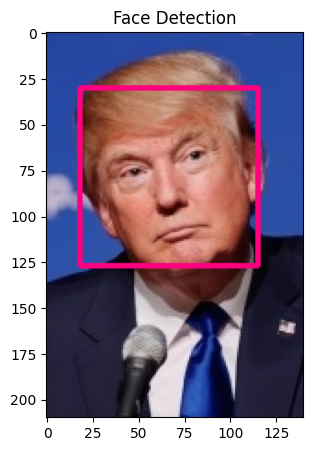

In [2]:
# We point OpenCV's CascadeClassifier function to where our classifier (XML file format) is stored
face_classifier= cv2.CascadeClassifier('haar_cascades//haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image= cv2.imread('images/donald_trump.jpg')
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#imshow(gray, 'Gray', 5)

# Our classifier returns the ROI (Region of Interest) of the detected face as a tuple 
# It stores the top left coordinate and the bottom right coordiantes
faces= face_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# When no faces detected, face_classifier returns and empty tuple
if faces is np.empty:
    print('No faces found')
    
# We iterate through our faces array and draw a rectangle over each face in faces
for x,y,w,h in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h), (127,0,255), 2)
    
imshow(image, 'Face Detection', 5)

In [3]:
faces.shape

(1, 4)

In [4]:
faces

array([[18, 30, 97, 97]], dtype=int32)

## **Simple Eye & Face Detection using Haarcascade Classifiers**

<>:10: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
/tmp/ipykernel_1365242/1839416519.py:10: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():
/tmp/ipykernel_1365242/1839416519.py:19: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if eyes is ():


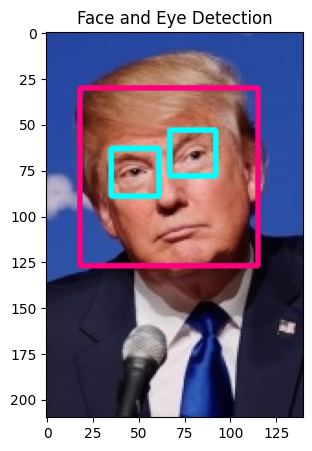

In [5]:
image= cv2.imread('images/donald_trump.jpg')
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_classifier= cv2.CascadeClassifier('haar_cascades/haarcascade_frontalface_default.xml')
eye_classifier= cv2.CascadeClassifier('haar_cascades/haarcascade_eye.xml')

faces= face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print('No faces found')
    
for x,y,w,h in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h), (127,0,255), 2)
    roi_gray = gray[y: y+h, x: x+w]
    roi_color = image[y: y+h, x: x+w]
    
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.03, 3)
    if eyes is ():
        print('No eyes found')
    for x,y,w,h in eyes:
        cv2.rectangle(roi_color, (x, y), (x+w, y+h), (255,255,0), 2)
    
imshow(image, 'Face and Eye Detection', 5)

In [6]:
faces

array([[18, 30, 97, 97]], dtype=int32)

In [7]:
eyes

array([[49, 23, 25, 25],
       [17, 33, 26, 26]], dtype=int32)

In [8]:
gray.shape

(210, 140)

In [9]:
image.shape

(210, 140, 3)

## Use your webcam to do live face and eye detection

In [10]:
#!sudo usermod -a -G video 784512

In [11]:
!id -a

uid=1000(mohammad-hossein-abedi) gid=1000(mohammad-hossein-abedi) groups=1000(mohammad-hossein-abedi),4(adm),24(cdrom),27(sudo),30(dip),46(plugdev),100(users),114(lpadmin)


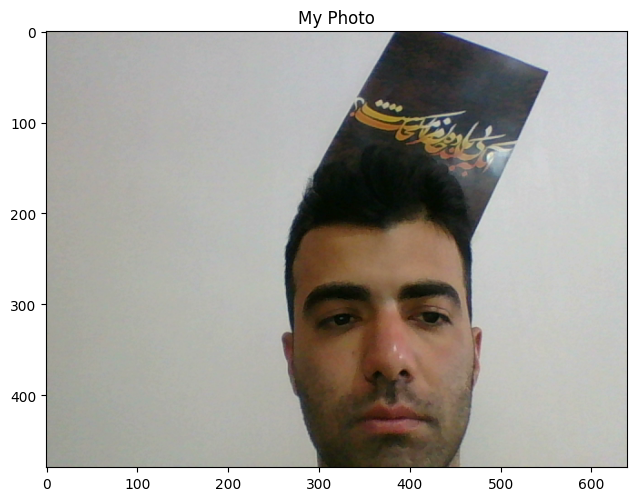

In [12]:
import cv2

# Create a video capture object and allocate camera ID 0 (your webcam)
cap = cv2.VideoCapture(0)

# Capture a photo and store it in the ‘photo’ variable
status, photo = cap.read()

# Release the camera after capturing the photo
cap.release()

# Display the captured photo in a window titled “My Photo”
imshow(photo, 'My Photo')

# Wait for 5 seconds before closing the window
cv2.waitKey(5000)

# Close all OpenCV windows
cv2.destroyAllWindows()

In [13]:
status

True

In [14]:
photo.shape

(480, 640, 3)

In [15]:
cap.release()
cv2.destroyAllWindows()

<>:8: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
/tmp/ipykernel_1365242/1292311005.py:8: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


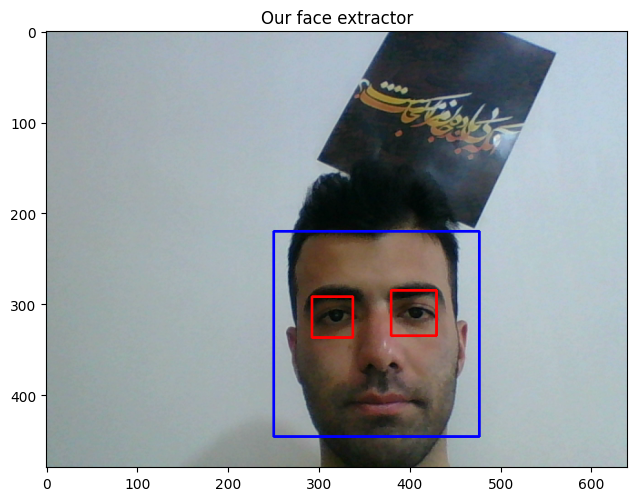

In [27]:
face_classifier= cv2.CascadeClassifier('haar_cascades/haarcascade_frontalface_default.xml')
eye_classifier= cv2.CascadeClassifier('haar_cascades/haarcascade_eye.xml')

def face_detector(image):
    gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces= face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is ():
        return image
    
    for x,y,w,h in faces:
#         x = x - 50
#         y = y - 50
#         w = w + 50
#         h = h + 50
        cv2.rectangle(image, (x, y), (x+w, y+h), (255,0,0), 2)
        roi_gray = gray[y: y+h, x: x+w]
        roi_color = image[y: y+h, x: x+w]
        
        eyes= eye_classifier.detectMultiScale(roi_gray)
        for ex,ey,ew,eh in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,0,255), 2)
        
    #roi_color= cv2.flip(roi_color, 1)    
    return image

cap= cv2.VideoCapture(0)
status, frame= cap.read()
extracted_faces= face_detector(frame)
imshow(extracted_faces, 'Our face extractor')
cv2.imwrite('my_face_extracted.png', extracted_faces)    

cap.release()
cv2.destroyAllWindows()

In [17]:
status

True

In [18]:
frame.shape

(480, 640, 3)

In [19]:
faces

array([[18, 30, 97, 97]], dtype=int32)